In [1]:
import pandas as pd

In [2]:
import seaborn as sns
from pathlib import Path

In [4]:
out_dired = Path('perf_output/')
df = pd.read_csv(out_dired / 'exp1.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.rename(columns={'walltime': 'walltime (s)', 'd': 'd (head dim)'}, inplace=False)
df['impl'] = df['naive'].map(lambda x: 'naive' if x else 'fused')

sns.set()
sns.relplot(data=df, x='d (head dim)', y='walltime (s)', hue='impl', col='order', row='attn_type', kind='line')

FileNotFoundError: [Errno 2] No such file or directory: 'perf_output/exp1.csv'

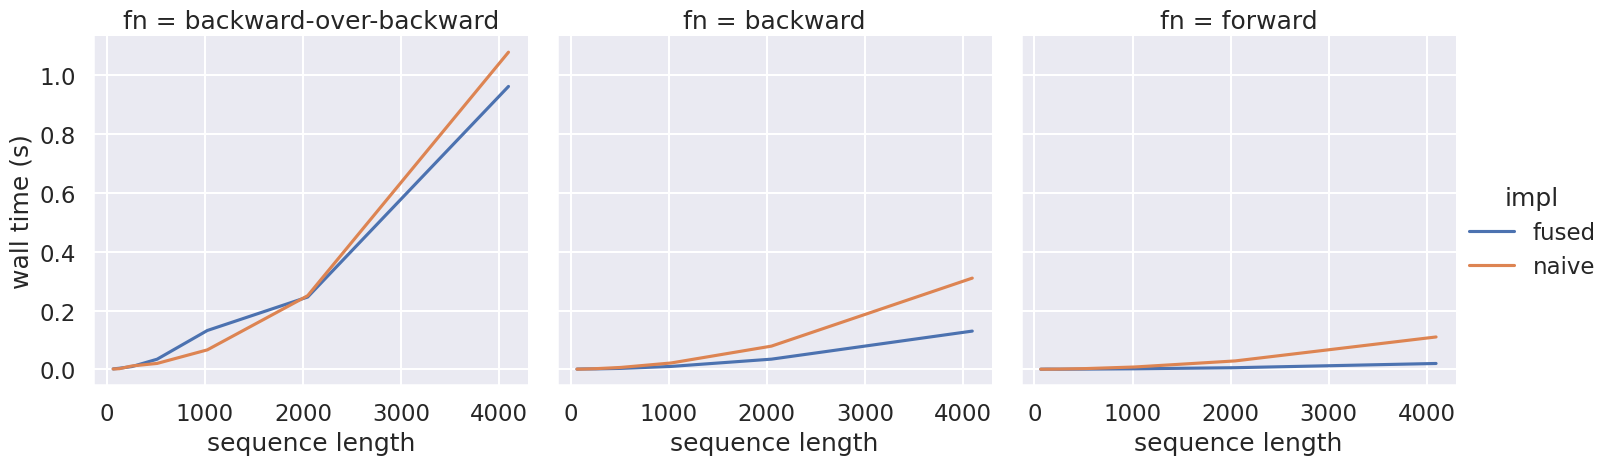

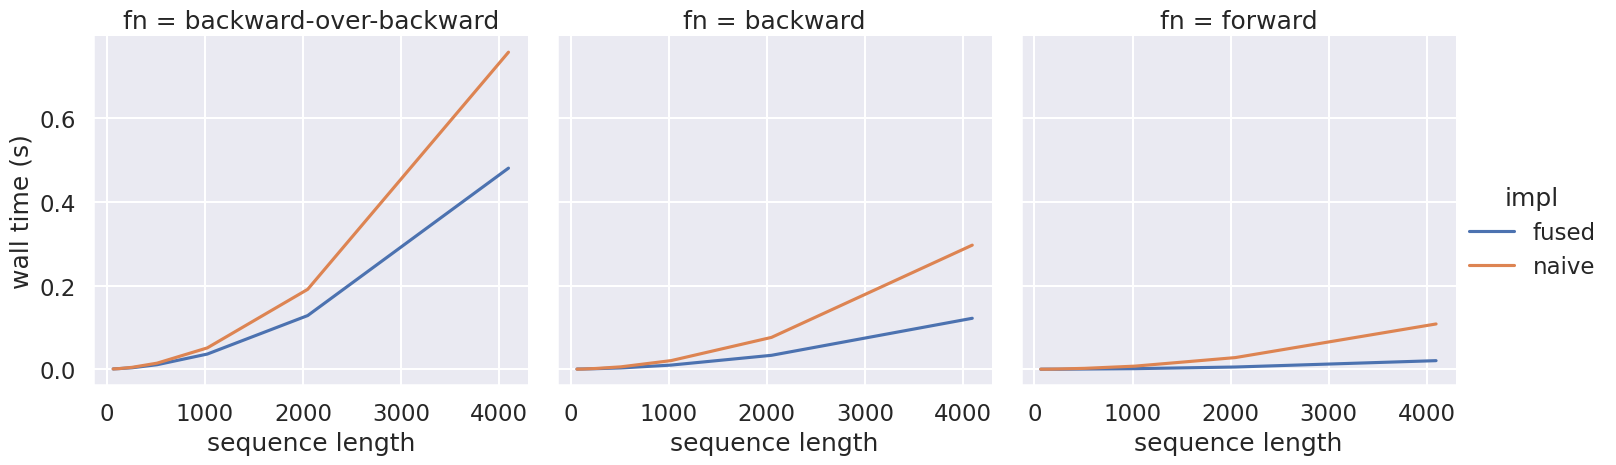

In [ ]:
sns.set()
out_dired = Path('../perf_output/')
df = pd.read_csv(out_dired / 'exp2.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.rename(columns={'walltime': 'wall time (s)', 'r': 'sequence length', 'order': 'fn'}, inplace=False)
df['impl'] = df['naive'].map(lambda x: 'naive' if x else 'fused')
df['fn'] = df['fn'].map({0: 'forward', 1: 'backward', 2: 'backward-over-backward'}.__getitem__)

sns.set_context('talk')
max_time = df['wall time (s)'].max()
# plt.title('Performance Comparison')
import matplotlib.pyplot as plt
for attn_type in df['attn_type'].unique():
        # keep a constant max time for all plots
        sns.relplot(data=df[(df['attn_type'] == attn_type)], col='fn', x='sequence length', y='wall time (s)', hue='impl', kind='line', height=5, aspect=1.5)
        # save as svg
        plt.savefig(f'exp2_{attn_type}.svg')
        plt.show()
# sns.relplot(data=df, x='sequence length', y='walltime (s)', hue='impl', col='order', row='attn_type', kind='line')